In [1]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup

In [20]:
games = pd.read_csv('data/game.csv', on_bad_lines='skip')
games.head()

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
0,21946,1610610035,HUS,Toronto Huskies,24600001,1946-11-01 00:00:00,HUS vs. NYK,L,0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,2,0,Regular Season
1,21946,1610610034,BOM,St. Louis Bombers,24600003,1946-11-02 00:00:00,BOM vs. PIT,W,0,20.0,...,NaN,NaN,NaN,NaN,NaN,25.0,51.0,-5,0,Regular Season
2,21946,1610610032,PRO,Providence Steamrollers,24600002,1946-11-02 00:00:00,PRO vs. BOS,W,0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,53.0,-6,0,Regular Season
3,21946,1610610025,CHS,Chicago Stags,24600004,1946-11-02 00:00:00,CHS vs. NYK,W,0,21.0,...,NaN,NaN,NaN,NaN,NaN,22.0,47.0,-16,0,Regular Season
4,21946,1610610028,DEF,Detroit Falcons,24600005,1946-11-02 00:00:00,DEF vs. WAS,L,0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,50.0,17,0,Regular Season


## Web Scraping from NBA-Reference

Reference url: https://www.basketball-reference.com/boxscores/197711110BOS.html

In [84]:
base_url = 'https://www.basketball-reference.com/boxscores/'

addition = '197711110BOS.html'

url = base_url + addition

page = requests.get(url)
soup = BeautifulSoup(page.content, "html.parser")


# Find rows of first Box
box1 = soup.find(id="div_box-BUF-game-basic")

rows = box1.find_all("td", class_="right")
rows = rows[:85]
print(len(rows))

array = np.empty((5, 17), dtype=object)

for index, row in enumerate(rows):
    rown = index // 17
    coln = index % 17
    array[rown,coln] = str(row.text)

print(array)


new_col = []
player_names = box1.find_all("th", class_="left")[:5]
for name in player_names:
    new_col.append(str(name.text))

print(new_col)

new_col = np.array(new_col)
new_col = new_col.reshape((5,1))

stats_home = np.hstack((new_col, array))
print(stats_home)

85
[['46:00' '11' '22' '.500' '12' '13' '.923' '' '' '3' '2' '' '' '' '3'
  '34' '']
 ['38:00' '6' '9' '.667' '5' '5' '1.000' '' '' '5' '5' '' '' '' '2' '17'
  '']
 ['37:00' '3' '11' '.273' '3' '4' '.750' '' '' '2' '1' '' '' '' '4' '9'
  '']
 ['35:00' '8' '13' '.615' '0' '0' '' '' '' '8' '2' '' '' '' '4' '16' '']
 ['33:00' '2' '8' '.250' '1' '1' '1.000' '' '' '1' '5' '' '' '' '2' '5'
  '']]
['Randy Smith', 'Chuck Williams', 'Billy Knight', 'Swen Nater', 'John Shumate']
[['Randy Smith' '46:00' '11' '22' '.500' '12' '13' '.923' '' '' '3' '2'
  '' '' '' '3' '34' '']
 ['Chuck Williams' '38:00' '6' '9' '.667' '5' '5' '1.000' '' '' '5' '5'
  '' '' '' '2' '17' '']
 ['Billy Knight' '37:00' '3' '11' '.273' '3' '4' '.750' '' '' '2' '1' ''
  '' '' '4' '9' '']
 ['Swen Nater' '35:00' '8' '13' '.615' '0' '0' '' '' '' '8' '2' '' '' ''
  '4' '16' '']
 ['John Shumate' '33:00' '2' '8' '.250' '1' '1' '1.000' '' '' '1' '5' ''
  '' '' '2' '5' '']]


### Applying whole process to single sample before making script:

In [90]:
# Extract game date:
games['game_date'] = pd.to_datetime(games['game_date'])
sample_game = games.sample(n=1)
sample_game.head()

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
35665,21999,1610612737,ATL,Atlanta Hawks,29900818,2000-03-01,ATL vs. WAS,L,240,32.0,...,37.0,25.0,8.0,2.0,13.0,21.0,102.0,19,0,Regular Season


In [95]:
date = pd.Timestamp(sample_game['game_date'].values[0])
day = str(date.day)
month = str(date.month)
year = str(date.year)

home_abv = sample_game['team_abbreviation_home'].values[0]
away_abv = sample_game['team_abbreviation_away'].values[0]

base_url = 'https://www.basketball-reference.com/boxscores/'

if len(day) <= 2:
    day = '0' + day
if len(month) <= 2:
    month = '0' + month

addition = year + month + day + '0' + home_abv + '.html'

url = base_url + addition
print(url)

https://www.basketball-reference.com/boxscores/200003010ATL.html


In [96]:
page = requests.get(url)
soup = BeautifulSoup(page.content, "html.parser")

In [98]:
div1_name = 'div_box-' + home_abv + '-game-basic'
div2_name = 'div_box-' + away_abv + '-game-basic'

box1 = soup.find(id=div1_name)
box2 = soup.find(id=div2_name)

rows1 = box1.find_all("td", class_="right")
rows1 = rows1[:85]

rows2 = box2.find_all("td", class_="right")
rows2 = rows2[:85]

array_home = np.empty((5, 17), dtype=object)
array_away = np.empty((5, 17), dtype=object)

for index, row in enumerate(rows):
    rown = index // 17
    coln = index % 17
    array_home[rown,coln] = str(row.text)

for index, row in enumerate(rows):
    rown = index // 17
    coln = index % 17
    array_away[rown,coln] = str(row.text)


# add player names to rows
new_col1 = np.empty((5,1), dtype=object)
new_col2 = np.empty((5,1), dtype=object)

player_names1 = box1.find_all("th", class_="left")[:5]
player_names2 = box2.find_all("th", class_="left")[:5]

for index, name in enumerate(player_names1):
    new_col1[index] = str(name.text)

for index, name in enumerate(player_names2):
    new_col2[index] = str(name.text)

stats_home = np.hstack((new_col1, array_home))
stats_away = np.hstack((new_col2, array_away))


# add home team abv/away team abv
abv_col_1 = np.empty((5,1), dtype=object)
abv_col_2 = np.empty((5,1), dtype=object)
abv_col_1[:,0] = home_abv
abv_col_2[:,0] = away_abv

stats_home = np.hstack((abv_col_1, stats_home))
stats_away = np.hstack((abv_col_2, stats_away))

# add col for game id
game_id = sample_game['game_id'].values[0]
season_id = sample_game['season_id'].values[0]

new_col = np.empty((5,2), dtype=object)
new_col[:,0] = game_id
new_col[:,1] = season_id

stats_home = np.hstack((new_col, stats_home))
stats_away = np.hstack((new_col, stats_away))

print(stats_home)
print(stats_away)

[[29900818 21999 'ATL' 'Dikembe Mutombo' '46:00' '11' '22' '.500' '12'
  '13' '.923' '' '' '3' '2' '' '' '' '3' '34' '']
 [29900818 21999 'ATL' 'Isaiah Rider' '38:00' '6' '9' '.667' '5' '5'
  '1.000' '' '' '5' '5' '' '' '' '2' '17' '']
 [29900818 21999 'ATL' 'Jim Jackson' '37:00' '3' '11' '.273' '3' '4'
  '.750' '' '' '2' '1' '' '' '' '4' '9' '']
 [29900818 21999 'ATL' 'Alan Henderson' '35:00' '8' '13' '.615' '0' '0'
  '' '' '' '8' '2' '' '' '' '4' '16' '']
 [29900818 21999 'ATL' 'Bimbo Coles' '33:00' '2' '8' '.250' '1' '1'
  '1.000' '' '' '1' '5' '' '' '' '2' '5' '']]
[[29900818 21999 'WAS' 'Gerard King' '46:00' '11' '22' '.500' '12' '13'
  '.923' '' '' '3' '2' '' '' '' '3' '34' '']
 [29900818 21999 'WAS' 'Mitch Richmond' '38:00' '6' '9' '.667' '5' '5'
  '1.000' '' '' '5' '5' '' '' '' '2' '17' '']
 [29900818 21999 'WAS' 'Juwan Howard' '37:00' '3' '11' '.273' '3' '4'
  '.750' '' '' '2' '1' '' '' '' '4' '9' '']
 [29900818 21999 'WAS' 'Rod Strickland' '35:00' '8' '13' '.615' '0' '0'
  ''

## Building Dataset with NBA API:

In [35]:
import matplotlib.pyplot as plt

# test

games['game_date'] = pd.to_datetime(games['game_date'])

games['year'] = games['game_date'].dt.year

KeyError: 'game_date'

In [22]:
games = games[games['year'] > 1985]

In [23]:
games.shape

(46148, 56)

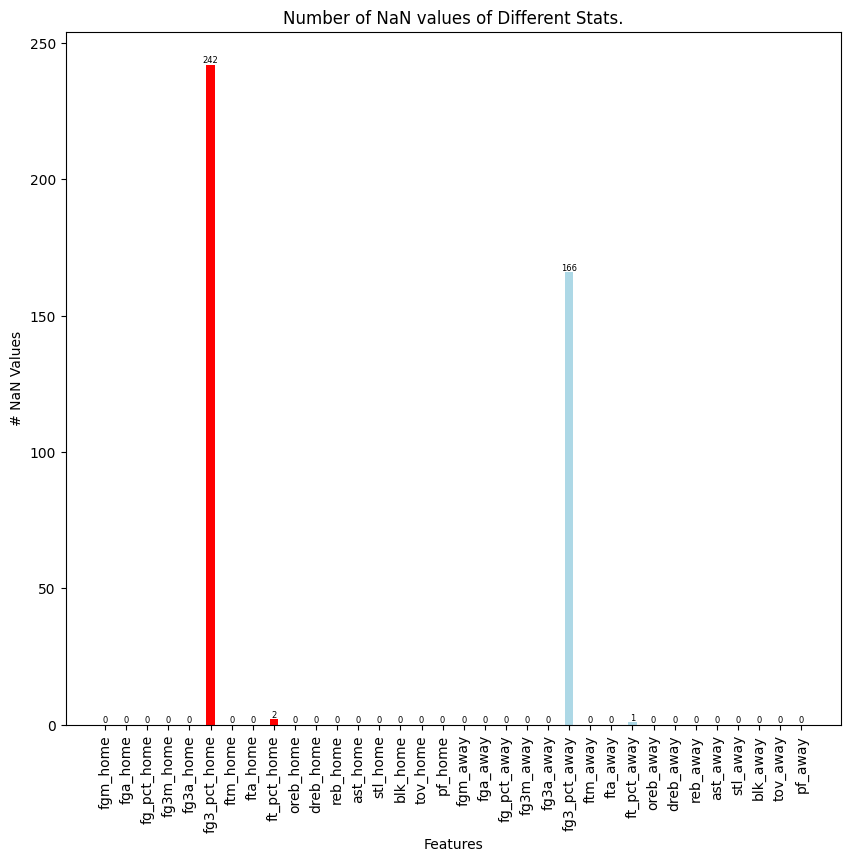

In [24]:
# Home Stats
nan_fgm_home = games['fgm_home'].isna().sum()
nan_fga_home = games['fga_home'].isna().sum()
nan_fg_pct_home = games['fg_pct_home'].isna().sum()
nan_fg3m_home = games['fg3m_home'].isna().sum()
nan_fg3a_home = games['fg3a_home'].isna().sum()
nan_fg3_pct_home = games['fg3_pct_home'].isna().sum()
nan_ftm_home = games['ftm_home'].isna().sum()
nan_fta_home = games['fta_home'].isna().sum()
nan_ft_pct_home = games['ft_pct_home'].isna().sum()
nan_oreb_home = games['oreb_home'].isna().sum()
nan_dreb_home = games['dreb_home'].isna().sum()
nan_reb_home = games['reb_home'].isna().sum()
nan_ast_home = games['ast_home'].isna().sum()
nan_stl_home = games['stl_home'].isna().sum()
nan_blk_home = games['blk_home'].isna().sum()
nan_tov_home = games['tov_home'].isna().sum()
nan_pf_home = games['pf_home'].isna().sum()

# Away Stats
nan_fgm_away = games['fgm_away'].isna().sum()
nan_fga_away = games['fga_away'].isna().sum()
nan_fg_pct_away = games['fg_pct_away'].isna().sum()
nan_fg3m_away = games['fg3m_away'].isna().sum()
nan_fg3a_away = games['fg3a_away'].isna().sum()
nan_fg3_pct_away = games['fg3_pct_away'].isna().sum()
nan_ftm_away = games['ftm_away'].isna().sum()
nan_fta_away = games['fta_away'].isna().sum()
nan_ft_pct_away = games['ft_pct_away'].isna().sum()
nan_oreb_away = games['oreb_away'].isna().sum()
nan_dreb_away = games['dreb_away'].isna().sum()
nan_reb_away = games['reb_away'].isna().sum()
nan_ast_away = games['ast_away'].isna().sum()
nan_stl_away = games['stl_away'].isna().sum()
nan_blk_away = games['blk_away'].isna().sum()
nan_tov_away = games['tov_away'].isna().sum()
nan_pf_away = games['pf_away'].isna().sum()

bar_labels_home = ['fgm_home', 'fga_home', 'fg_pct_home', 'fg3m_home', 'fg3a_home',
              'fg3_pct_home', 'ftm_home', 'fta_home', 'ft_pct_home', 'oreb_home',
              'dreb_home', 'reb_home', 'ast_home', 'stl_home', 'blk_home',
              'tov_home', 'pf_home']
bar_labels_away = ['fgm_away', 'fga_away', 'fg_pct_away', 'fg3m_away', 'fg3a_away',
              'fg3_pct_away', 'ftm_away', 'fta_away', 'ft_pct_away', 'oreb_away',
              'dreb_away', 'reb_away', 'ast_away', 'stl_away', 'blk_away',
              'tov_away', 'pf_away']
bar_labels = bar_labels_home + bar_labels_away

feats_home = [nan_fgm_home, nan_fga_home, nan_fg_pct_home, nan_fg3m_home,
              nan_fg3a_home, nan_fg3_pct_home, nan_ftm_home, nan_fta_home,
              nan_ft_pct_home, nan_oreb_home, nan_dreb_home, nan_reb_home,
              nan_ast_home, nan_stl_home, nan_blk_home, nan_tov_home, nan_pf_home]
feats_away = [nan_fgm_away, nan_fga_away, nan_fg_pct_away, nan_fg3m_away,
              nan_fg3a_away, nan_fg3_pct_away, nan_ftm_away, nan_fta_away,
              nan_ft_pct_away, nan_oreb_away, nan_dreb_away, nan_reb_away,
              nan_ast_away, nan_stl_away, nan_blk_away, nan_tov_away, nan_pf_away]
feats = feats_home + feats_away

colors_home = ['red'] * 17
colors_away = ['lightblue'] * 17
colors = colors_home + colors_away

plt.figure(figsize=(10, 9))
plt.title("Number of NaN values of Different Stats.")

bar = plt.bar(bar_labels, feats, color=colors, width = 0.4)

plt.xlabel("Features")
plt.ylabel("# NaN Values")
plt.bar_label(bar, fontsize=6)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# # general idea:

# import nba_api
# from nba_api.stats.endpoints import boxscoreadvancedv3

# # Define the required parameters for the endpoint
# game_id = '0021700807'  # Replace with the Game ID you're interested in
# end_period = 4          # Period of the game (4 = Full Game)
# end_range = 0           # End Range (typically 0 for full game stats)
# range_type = 0          # Range Type (usually 0 for full game)
# start_period = 1        # Start Period (1 = First Period)
# start_range = 0         # Start Range (usually 0 for full game)

# # Make the API call
# boxscore = boxscoreadvancedv3.BoxScoreAdvancedV3(
#     game_id=game_id,
#     end_period=end_period,
#     end_range=end_range,
#     range_type=range_type,
#     start_period=start_period,
#     start_range=start_range
# )

# # Retrieve the data
# player_stats = boxscore.player_stats.get_dict()
# team_stats = boxscore.team_stats.get_dict()

# player_stats = boxscore.player_stats.get_data_frame()
# print(player_stats.shape)

# player_stats.head()

In [ ]:
# print(games.loc[games['game_date'].dt.year == 2023, 'game_id'])

# # Game plan: iterate through rows (unfortunately), and create a giant dataframe with all boxscore information
# #   result = df.groupby('id').agg(list).reset_index() --> group by game_id, and then aggregate each game into a single row

# boxscores_df = pd.DataFrame(columns=injuries.columns)
# boxscores_df['gamId'] = np.nan
# boxscores_df['teamId'] = np.nan
# boxscores_df['gamId'] = np.nan


# print(player_stats.columns)

# game_ids = games['game_id'].unique()

# # for game in game_ids:

## Boxscores Dataset Test

In [53]:
boxscores = pd.read_csv('data/boxscores.csv', on_bad_lines='skip')
print(boxscores.shape)
print(boxscores.columns)
boxscores.head()

(1309778, 29)
Index(['Unnamed: 0', 'Season', 'Game_ID', 'PLAYER_NAME', 'Team', 'GAME_DATE',
       'MATCHUP', 'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'PLUS_MINUS', 'VIDEO_AVAILABLE'],
      dtype='object')


,Unnamed: 0,Season,Game_ID,PLAYER_NAME,Team,GAME_DATE,MATCHUP,WL,MIN,FGM,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,531380,1946,24600034,Adolph Hoefer,HUS,"NOV 19, 1946",HUS vs. CLR,L,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0,NaN,0
1,531378,1946,24600045,Adolph Hoefer,HUS,"NOV 23, 1946",HUS @ WAS,L,0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,0
2,531379,1946,24600042,Adolph Hoefer,HUS,"NOV 22, 1946",HUS vs. BOS,W,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,0
3,531377,1946,24600051,Adolph Hoefer,HUS,"NOV 26, 1946",HUS vs. WAS,L,0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,0
4,531376,1946,24600061,Adolph Hoefer,HUS,"NOV 29, 1946",HUS vs. CLR,L,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2,NaN,0


In [54]:
boxscores['year'] = boxscores['GAME_DATE'].str.split(' ').str[-1]

In [55]:
boxscores['year'] = pd.to_numeric(boxscores['year'])
boxscores = boxscores[boxscores['year'] > 1985]

In [56]:
boxscores.shape

(885798, 30)

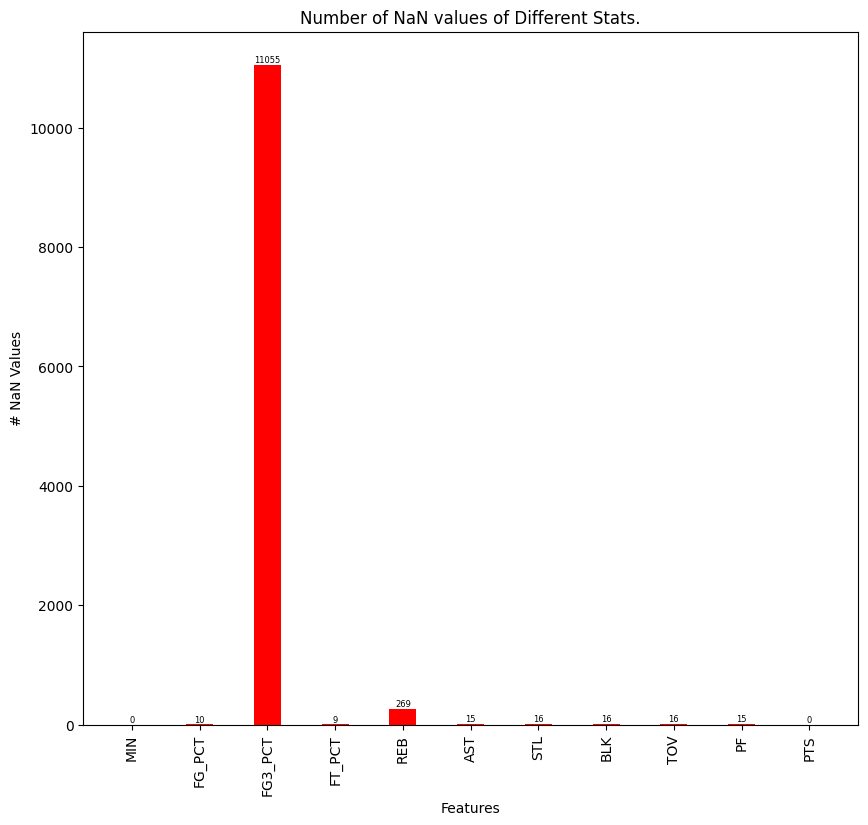

In [57]:
# Home Stats
nan_fgm_home = boxscores['MIN'].isna().sum()
nan_fg3m_home = boxscores['FG_PCT'].isna().sum()
nan_fg3_pct_home = boxscores['FG3_PCT'].isna().sum()
nan_ftm_home = boxscores['FT_PCT'].isna().sum()
nan_fta_home = boxscores['REB'].isna().sum()
nan_ft_pct_home = boxscores['AST'].isna().sum()
nan_oreb_home = boxscores['STL'].isna().sum()
nan_dreb_home = boxscores['BLK'].isna().sum()
nan_reb_home = boxscores['TOV'].isna().sum()
nan_ast_home = boxscores['PF'].isna().sum()
nan_stl_home = boxscores['PTS'].isna().sum()

bar_labels = ['MIN', 'FG_PCT', 'FG3_PCT', 'FT_PCT', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']


feats = [nan_fgm_home, nan_fg3m_home, nan_fg3_pct_home, nan_ftm_home, nan_fta_home,
              nan_ft_pct_home, nan_oreb_home, nan_dreb_home, nan_reb_home,
              nan_ast_home, nan_stl_home]

plt.figure(figsize=(10, 9))
plt.title("Number of NaN values of Different Stats.")

bar = plt.bar(bar_labels, feats, color='red', width = 0.4)

plt.xlabel("Features")
plt.ylabel("# NaN Values")
plt.bar_label(bar, fontsize=6)
plt.xticks(rotation=90)
plt.show()

In [58]:
teams = boxscores['Team'].unique()

new_boxscores = boxscores.iloc[0:0].copy()

count = 0

for team in teams:
    team_games = boxscores[boxscores['Team'] == team]
    team_games = team_games.groupby('Game_ID').agg(list).reset_index()

    count += 1
    print("\rTeam " + str(count) + "/" + str(len(teams)), end='')

    new_boxscores = pd.concat([new_boxscores, team_games], ignore_index=True)

new_boxscores.head()

Team 41/41

,Unnamed: 0,Season,Game_ID,PLAYER_NAME,Team,GAME_DATE,MATCHUP,WL,MIN,FGM,...,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE,year
0,"[1064512, 414531, 382617, 442191, 988458, 1636...","[2000, 2000, 2000, 2000, 2000, 2000, 2000, 200...",20000012,"[Brian Shaw, Devean George, Greg Foster, Horac...","[LAL, LAL, LAL, LAL, LAL, LAL, LAL, LAL, LAL, ...","[OCT 31, 2000, OCT 31, 2000, OCT 31, 2000, OCT...","[LAL @ POR, LAL @ POR, LAL @ POR, LAL @ POR, L...","[W, W, W, W, W, W, W, W, W, W, W]","[15, 3, 4, 48, 25, 35, 1, 27, 27, 43, 11]","[2, 1, 1, 2, 6, 4, 0, 2, 2, 14, 2]",...,"[1.0, 0.0, 1.0, 8.0, 5.0, 2.0, 0.0, 5.0, 5.0, ...","[3.0, 0.0, 1.0, 1.0, 3.0, 2.0, 0.0, 5.0, 6.0, ...","[0.0, 0.0, 0.0, 0.0, 2.0, 1.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 2.0, ...","[3.0, 2.0, 0.0, 1.0, 1.0, 7.0, 0.0, 0.0, 4.0, ...","[1.0, 1.0, 0.0, 5.0, 1.0, 4.0, 0.0, 3.0, 2.0, ...","[7, 3, 2, 5, 13, 14, 0, 6, 6, 36, 4]","[3.0, -9.0, 3.0, 8.0, 12.0, 8.0, 0.0, 3.0, -1....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[2000, 2000, 2000, 2000, 2000, 2000, 2000, 200..."
1,"[1064511, 414530, 382616, 442190, 988457, 1636...","[2000, 2000, 2000, 2000, 2000, 2000, 2000, 200...",20000019,"[Brian Shaw, Devean George, Greg Foster, Horac...","[LAL, LAL, LAL, LAL, LAL, LAL, LAL, LAL, LAL, ...","[NOV 01, 2000, NOV 01, 2000, NOV 01, 2000, NOV...","[LAL vs. UTA, LAL vs. UTA, LAL vs. UTA, LAL vs...","[L, L, L, L, L, L, L, L, L, L, L]","[15, 15, 4, 36, 30, 37, 3, 21, 23, 43, 11]","[2, 0, 0, 1, 4, 9, 0, 2, 0, 14, 2]",...,"[1.0, 1.0, 3.0, 9.0, 3.0, 4.0, 0.0, 0.0, 3.0, ...","[2.0, 0.0, 0.0, 0.0, 6.0, 5.0, 0.0, 0.0, 2.0, ...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 2.0, ...","[0.0, 1.0, 0.0, 0.0, 2.0, 2.0, 0.0, 1.0, 1.0, ...","[4.0, 1.0, 1.0, 6.0, 3.0, 3.0, 0.0, 3.0, 2.0, ...","[6, 0, 0, 2, 10, 31, 0, 4, 0, 34, 5]","[-5.0, 1.0, -7.0, -12.0, 1.0, 7.0, -2.0, -8.0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[2000, 2000, 2000, 2000, 2000, 2000, 2000, 200..."
2,"[1064510, 414529, 382615, 442189, 988456, 1636...","[2000, 2000, 2000, 2000, 2000, 2000, 2000, 200...",20000047,"[Brian Shaw, Devean George, Greg Foster, Horac...","[LAL, LAL, LAL, LAL, LAL, LAL, LAL, LAL, LAL, ...","[NOV 04, 2000, NOV 04, 2000, NOV 04, 2000, NOV...","[LAL @ VAN, LAL @ VAN, LAL @ VAN, LAL @ VAN, L...","[W, W, W, W, W, W, W, W, W, W, W, W]","[17, 9, 7, 40, 12, 40, 1, 22, 23, 20, 41, 10]","[2, 0, 2, 7, 1, 9, 0, 2, 2, 0, 12, 1]",...,"[2.0, 0.0, 1.0, 11.0, 1.0, 5.0, 0.0, 5.0, 5.0,...","[1.0, 0.0, 0.0, 2.0, 0.0, 2.0, 0.0, 5.0, 5.0, ...","[2.0, 0.0, 0.0, 1.0, 0.0, 5.0, 0.0, 0.0, 2.0, ...","[0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 0.0, 0.0, 1.0, ...","[2.0, 1.0, 2.0, 2.0, 2.0, 6.0, 0.0, 2.0, 0.0, ...","[2.0, 3.0, 3.0, 2.0, 2.0, 3.0, 0.0, 1.0, 0.0, ...","[4, 2, 4, 19, 2, 22, 0, 7, 8, 0, 27, 3]","[8.0, -9.0, -9.0, 18.0, -6.0, 9.0, -2.0, 16.0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[2000, 2000, 2000, 2000, 2000, 2000, 2000, 200..."
3,"[1064509, 414528, 382614, 442188, 988455, 1636...","[2000, 2000, 2000, 2000, 2000, 2000, 2000, 200...",20000049,"[Brian Shaw, Devean George, Greg Foster, Horac...","[LAL, LAL, LAL, LAL, LAL, LAL, LAL, LAL, LAL, ...","[NOV 05, 2000, NOV 05, 2000, NOV 05, 2000, NOV...","[LAL vs. LAC, LAL vs. LAC, LAL vs. LAC, LAL vs...","[W, W, W, W, W, W, W, W, W, W, W]","[14, 7, 4, 33, 27, 41, 21, 23, 21, 43, 7]","[2, 0, 0, 2, 6, 6, 2, 2, 4, 15, 0]",...,"[2.0, 0.0, 1.0, 9.0, 1.0, 5.0, 5.0, 5.0, 4.0, ...","[2.0, 0.0, 1.0, 1.0, 4.0, 6.0, 3.0, 3.0, 3.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...","[1.0, 0.0, 0.0, 0.0, 2.0, 2.0, 1.0, 2.0, 1.0, ...","[1.0, 2.0, 2.0, 3.0, 0.0, 2.0, 2.0, 2.0, 1.0, ...","[4, 0, 0, 4, 22, 21, 4, 5, 9, 39, 0]","[-9.0, -4.0, -4.0, 13.0, 0.0, 14.0, 2.0, 3.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[2000, 2000, 2000, 2000, 2000, 2000, 2000, 200..."
4,"[1064508, 414527, 382613, 442187, 988454, 1636...","[2000, 2000, 2000, 2000, 2000, 2000, 2000, 200...",2

In [59]:
new_boxscores['year'] = new_boxscores['year'].str[0]
new_boxscores['Season'] = new_boxscores['Season'].str[0]
new_boxscores['GAME_DATE'] = new_boxscores['GAME_DATE'].str[0]
new_boxscores['WL'] = new_boxscores['WL'].str[0]
new_boxscores['Team'] = new_boxscores['Team'].str[0]
new_boxscores['MATCHUP'] = new_boxscores['MATCHUP'].str[0]
new_boxscores.head()

,Unnamed: 0,Season,Game_ID,PLAYER_NAME,Team,GAME_DATE,MATCHUP,WL,MIN,FGM,...,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE,year
0,"[1064512, 414531, 382617, 442191, 988458, 1636...",2000,20000012,"[Brian Shaw, Devean George, Greg Foster, Horac...",LAL,"OCT 31, 2000",LAL @ POR,W,"[15, 3, 4, 48, 25, 35, 1, 27, 27, 43, 11]","[2, 1, 1, 2, 6, 4, 0, 2, 2, 14, 2]",...,"[1.0, 0.0, 1.0, 8.0, 5.0, 2.0, 0.0, 5.0, 5.0, ...","[3.0, 0.0, 1.0, 1.0, 3.0, 2.0, 0.0, 5.0, 6.0, ...","[0.0, 0.0, 0.0, 0.0, 2.0, 1.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 2.0, ...","[3.0, 2.0, 0.0, 1.0, 1.0, 7.0, 0.0, 0.0, 4.0, ...","[1.0, 1.0, 0.0, 5.0, 1.0, 4.0, 0.0, 3.0, 2.0, ...","[7, 3, 2, 5, 13, 14, 0, 6, 6, 36, 4]","[3.0, -9.0, 3.0, 8.0, 12.0, 8.0, 0.0, 3.0, -1....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",2000
1,"[1064511, 414530, 382616, 442190, 988457, 1636...",2000,20000019,"[Brian Shaw, Devean George, Greg Foster, Horac...",LAL,"NOV 01, 2000",LAL vs. UTA,L,"[15, 15, 4, 36, 30, 37, 3, 21, 23, 43, 11]","[2, 0, 0, 1, 4, 9, 0, 2, 0, 14, 2]",...,"[1.0, 1.0, 3.0, 9.0, 3.0, 4.0, 0.0, 0.0, 3.0, ...","[2.0, 0.0, 0.0, 0.0, 6.0, 5.0, 0.0, 0.0, 2.0, ...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 2.0, ...","[0.0, 1.0, 0.0, 0.0, 2.0, 2.0, 0.0, 1.0, 1.0, ...","[4.0, 1.0, 1.0, 6.0, 3.0, 3.0, 0.0, 3.0, 2.0, ...","[6, 0, 0, 2, 10, 31, 0, 4, 0, 34, 5]","[-5.0, 1.0, -7.0, -12.0, 1.0, 7.0, -2.0, -8.0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",2000
2,"[1064510, 414529, 382615, 442189, 988456, 1636...",2000,20000047,"[Brian Shaw, Devean George, Greg Foster, Horac...",LAL,"NOV 04, 2000",LAL @ VAN,W,"[17, 9, 7, 40, 12, 40, 1, 22, 23, 20, 41, 10]","[2, 0, 2, 7, 1, 9, 0, 2, 2, 0, 12, 1]",...,"[2.0, 0.0, 1.0, 11.0, 1.0, 5.0, 0.0, 5.0, 5.0,...","[1.0, 0.0, 0.0, 2.0, 0.0, 2.0, 0.0, 5.0, 5.0, ...","[2.0, 0.0, 0.0, 1.0, 0.0, 5.0, 0.0, 0.0, 2.0, ...","[0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 0.0, 0.0, 1.0, ...","[2.0, 1.0, 2.0, 2.0, 2.0, 6.0, 0.0, 2.0, 0.0, ...","[2.0, 3.0, 3.0, 2.0, 2.0, 3.0, 0.0, 1.0, 0.0, ...","[4, 2, 4, 19, 2, 22, 0, 7, 8, 0, 27, 3]","[8.0, -9.0, -9.0, 18.0, -6.0, 9.0, -2.0, 16.0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",2000
3,"[1064509, 414528, 382614, 442188, 988455, 1636...",2000,20000049,"[Brian Shaw, Devean George, Greg Foster, Horac...",LAL,"NOV 05, 2000",LAL vs. LAC,W,"[14, 7, 4, 33, 27, 41, 21, 23, 21, 43, 7]","[2, 0, 0, 2, 6, 6, 2, 2, 4, 15, 0]",...,"[2.0, 0.0, 1.0, 9.0, 1.0, 5.0, 5.0, 5.0, 4.0, ...","[2.0, 0.0, 1.0, 1.0, 4.0, 6.0, 3.0, 3.0, 3.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...","[1.0, 0.0, 0.0, 0.0, 2.0, 2.0, 1.0, 2.0, 1.0, ...","[1.0, 2.0, 2.0, 3.0, 0.0, 2.0, 2.0, 2.0, 1.0, ...","[4, 0, 0, 4, 22, 21, 4, 5, 9, 39, 0]","[-9.0, -4.0, -4.0, 13.0, 0.0, 14.0, 2.0, 3.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",2000
4,"[1064508, 414527, 382613, 442187, 988454, 1636...",2000,20000058,"[Brian Shaw, Devean George, Greg Foster, Horac...",LAL,"NOV 07, 2000",LAL @ HOU,L,"[12, 9, 3, 27, 27, 47, 22, 20, 24, 45, 4]","[1, 0, 0, 2, 4, 7, 2, 1, 3, 8, 0]",...,"[1.0, 1.0, 0.0, 5.0, 2.0, 3.0, 5.0, 6.0, 3.0, ...","[3.0, 2.0, 0.0, 0.0, 0.0, 3.0, 2.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 1.0, 4.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 4.0, 1.0, 6.0, 1.0, 2.0, ...","[1.0, 0.0, 0.0, 1.0, 3.0, 3.0, 4.0, 2.0, 2.0, ...","[3, 2, 0, 5, 9, 15, 6, 4, 6, 24, 0]","[-4.0, 0.0, -4.0, -1.0, -10.0, -12.0, -2.0, -7...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",2000


In [46]:
print(new_boxscores[new_boxscores['Game_ID'] == 20000012]['PLAYER_NAME'].values[0])

['Brian Shaw', 'Devean George', 'Greg Foster', 'Horace Grant', 'Isaiah Rider', 'Kobe Bryant', 'Mark Madsen', 'Rick Fox', 'Ron Harper', "Shaquille O'Neal", 'Tyronn Lue']
[1986, 1986, 1986, 1986, 1986, 1986, 1986]


In [76]:
new_boxscores['num_players'] = new_boxscores['PLAYER_NAME'].apply(len)
print(new_boxscores['num_players'].idxmax())
print(new_boxscores.iloc[1647]['MIN'])

1647
[21, 12, 8, 25, 7, 12, 23, 6, 20, 24, 16, 24, 11, 16, 13]


In [77]:
print(new_boxscores[new_boxscores['Game_ID'] == 20000049])

                                              Unnamed: 0  Season   Game_ID  \
3      [1064509, 414528, 382614, 442188, 988455, 1636...    2000  20000049   
40545  [1079101, 805411, 935686, 784246, 311626, 8860...    2000  20000049   

                                             PLAYER_NAME Team     GAME_DATE  \
3      [Brian Shaw, Devean George, Greg Foster, Horac...  LAL  NOV 05, 2000   
40545  [Brian Skinner, Darius Miles, Eric Piatkowski,...  LAC  NOV 05, 2000   

           MATCHUP WL                                        MIN  \
3      LAL vs. LAC  W  [14, 7, 4, 33, 27, 41, 21, 23, 21, 43, 7]   
40545    LAC @ LAL  L     [7, 26, 25, 42, 6, 42, 22, 11, 23, 36]   

                                      FGM  ...  \
3      [2, 0, 0, 2, 6, 6, 2, 2, 4, 15, 0]  ...   
40545      [0, 2, 5, 8, 1, 6, 3, 2, 5, 8]  ...   

                                                     AST  \
3      [2.0, 0.0, 1.0, 1.0, 4.0, 6.0, 3.0, 3.0, 3.0, ...   
40545  [1.0, 1.0, 2.0, 8.0, 0.0, 6.0, 0.0, 0.0, 1.0

### Player Info

### Second Dataset?

In [60]:
# boxscores2 = pd.read_csv('data/traditional.csv', on_bad_lines='skip')
# print(boxscores2.shape)
# print(boxscores2.columns)
# boxscores2.head()

In [61]:
# print(boxscores2['season'].min())
# boxscores2.shape

In [62]:
# teams = boxscores2['team'].unique()

# new_boxscores = boxscores2.iloc[0:0].copy()

# count = 0

# for team in teams:
#     team_games = boxscores2[boxscores2['team'] == team]
#     team_games = team_games.groupby('date').agg(list).reset_index()

#     count += 1
#     print("\rTeam " + str(count) + "/" + str(len(teams)), end='')

#     new_boxscores = pd.concat([new_boxscores, team_games], ignore_index=True)

# new_boxscores.head()

In [63]:
# new_boxscores.shape

In [64]:
# new_boxscores['players_len'] = new_boxscores['player'].apply(len)
# print(new_boxscores['players_len'].nunique())